# Fatal Police Shootings Analysis

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [2]:
data = pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Create summary table

In [3]:
summary_table1 = data.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size')
summary_table1

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [4]:
summary_table2 = data.pivot_table(index=['race', 'signs_of_mental_illness'], aggfunc='count', values='id')
summary_table2

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

Calculate mentally ill deathtoll % by race

In [5]:
summary_table1['percentage_mental_illness'] = summary_table1.apply(
    lambda row: (row[True] / (row[True] + row[False])) * 100, axis=1)

print("Summary with Percentage of Mental Illness:\n")
print(summary_table1)

highest_percentage_race = summary_table1['percentage_mental_illness'].idxmax()
highest_percentage_value = summary_table1['percentage_mental_illness'].max()
print(f"\nThe race with the highest percentage of mental illness is '{highest_percentage_race}' with {highest_percentage_value:.2f}%")

Summary with Percentage of Mental Illness:

signs_of_mental_illness  False  True  percentage_mental_illness
race                                                           
A                           69    24                  25.806452
B                         1114   184                  14.175655
H                          745   157                  17.405765
N                           64    14                  17.948718
O                           37    11                  22.916667
W                         1763   713                  28.796446

The race with the highest percentage of mental illness is 'W' with 28.80%


Add day of week to data

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.day_name()
data.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
2293,2549,Rodney Henderson,2017-05-02,shot and Tasered,knife,48.0,M,B,Irving,TX,False,attack,Not fleeing,False,Tuesday
379,475,Cassandra Bolin,2015-05-25,shot,gun,31.0,F,W,Austin,TX,True,attack,Not fleeing,False,Monday
1372,1556,Mark Nelson,2016-05-21,shot,gun,31.0,M,N,Flagstaff,AZ,True,attack,Not fleeing,True,Saturday
4601,5017,TK TK,2019-09-07,shot,knife,NaN,M,NaN,Nacogdoches,TX,False,other,Not fleeing,False,Saturday
174,276,Cedrick Lamont Bishop,2015-03-09,shot,gun,30.0,M,B,Cocoa,FL,False,attack,Not fleeing,False,Monday


Summary by day of week

In [7]:
interventions_by_day = data['day_of_week'].value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
interventions_by_day = interventions_by_day.reindex(ordered_days)
interventions_by_day

day_of_week
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

Create bar chart for Number of Interventions per Day of the Week

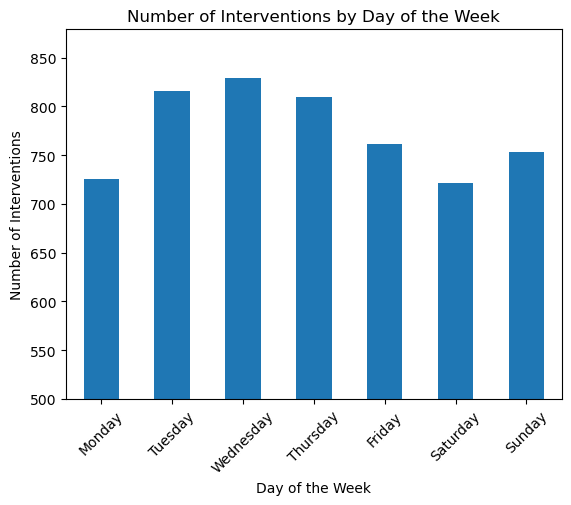

In [8]:
interventions_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Interventions')
plt.title('Number of Interventions by Day of the Week')
plt.xticks(rotation=45)
plt.ylim(500, interventions_by_day.max() + 50)
plt.show()

Load additional data

In [9]:
abbreviations_url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations'
abbreviations_df = pd.read_html(abbreviations_url)[1]

population_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
population_df = pd.read_html(population_url)[0]

Manipulate loaded data

In [10]:
abbreviations_df = abbreviations_df[['Name', 'USPS']]
abbreviations_df.columns = ['state', 'abbreviation']

In [11]:
population_df = population_df[['State', 'Census population, April 1, 2020 [1][2]']]
population_df.columns = ['state', 'population']

In [12]:
states_info = pd.merge(population_df, abbreviations_df, on='state')

In [13]:
states_info.drop(states_info.index[53:], inplace=True)

Combine with fatal police interventions data

In [14]:
intervention_counts = data['state'].value_counts().reset_index()
intervention_counts.columns = ['abbreviation', 'interventions']

In [ ]:
merged_data = pd.merge(states_info, intervention_counts, on='abbreviation')
merged_data['i_per_1000'] = round((merged_data['population'] / merged_data['interventions'] / 1000), 2)

merged_data_sorted = merged_data.sort_values(by='i_per_1000', ascending=False)

print(merged_data_sorted[['state', 'abbreviation', 'population', 'interventions', 'i_per_1000']])


                   state abbreviation  population  interventions  i_per_1000
42          Rhode Island           RI     1097379              4      274.34
14         Massachusetts           MA     7029917             35      200.85
3               New York           NY    20201249            101      200.01
28           Connecticut           CT     3605944             21      171.71
10            New Jersey           NJ     9288994             68      136.60
9               Michigan           MI    10077331             78      129.20
5               Illinois           IL    12812508            104      123.20
4           Pennsylvania           PA    13002700            108      120.40
40         New Hampshire           NH     1377529             13      105.96
30                  Iowa           IA     3190369             32       99.70
21             Minnesota           MN     5706494             61       93.55
11              Virginia           VA     8631393             95       90.86